In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import svm
import sys
# from plot import *
# set_things()

Q1. Plot the training data(Data1.xlsx) to get an idea of the data distribution. Plot the points with variable 1 on x-axis and variable 2 on y-axis. Now color the coordinates/points of class 0 with blue and class 1 with red. Report your visual observations.

<h2>Loading dataset for Q1

In [19]:
df_train = pd.read_excel('Data1.xlsx')

<h2>Visualising the dataset

findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans.


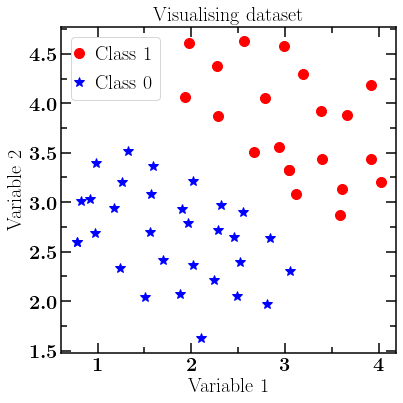

In [20]:
x1 = df_train['Variable 1'].values
x2 = df_train['Variable 2'].values
y = df_train['Class'].values
for i in range(len(y)):
    if y[i]==-1:
        plt.plot(x1[i],x2[i],'-b*')
    if i==49:
        plt.plot(x1[i],x2[i],'-b*',label='Class 0') 
    
    if y[i]==1:
        plt.plot(x1[i],x2[i],'-ro')
    if i==19:
        plt.plot(x1[i],x2[i],'-ro',label='Class 1')
fontl  = {'fontweight':1000,'fontsize':12}
plt.legend(handlelength=0,frameon=True)
plt.title("Visualising dataset")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
# plt.savefig("Q1.png",dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

Q2. Apply SVM on training data (Data1.xlsx) to find decision boundary. Plot training data along with decision boundary

<h2>Solving for weights and bias </h2>
    <p>required to plot the decision boundary since the dataset is linearly separable

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


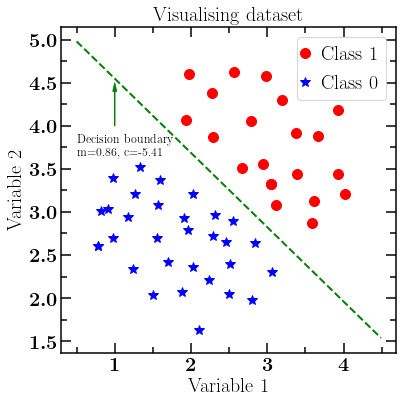

In [21]:
x1 = df_train['Variable 1'].values
x2 = df_train['Variable 2'].values
y = df_train['Class'].values
for i in range(len(y)):
    if y[i]==-1:
        plt.plot(x1[i],x2[i],'-b*')
    if i==49:
        plt.plot(x1[i],x2[i],'-b*',label='Class 0') 
    
    if y[i]==1:
        plt.plot(x1[i],x2[i],'-ro')
    if i==19:
        plt.plot(x1[i],x2[i],'-ro',label='Class 1')
fontl  = {'fontweight':1000,'fontsize':12}
plt.legend(handlelength=0,frameon=True)
plt.title("Visualising dataset")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
X = df_train[df_train.columns[0:-1]]
y = df_train[df_train.columns[-1]]
C=1
clf = svm.SVC(kernel='linear',C=C).fit(X,y)
lin_svc=svm.LinearSVC(C=C).fit(X,y)
c=lin_svc.coef_
intercept=lin_svc.intercept_
xx = np.arange(0.5,4.5,0.01)
yy = -(c[0][0]/c[0][1])*xx - intercept/c[0][1]
plt.plot(xx,yy,'--g',label='Decision boundary')
# plt.legend()
ax = plt.axes()
ax.arrow(1.0,4.0,0,0.4,head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.text(0.5,3.8,'Decision boundary',fontl)
plt.text(0.5,3.65,'m=%0.2f, c=%0.2f'%(c[0][0]/c[0][1],intercept/c[0][1]),fontsize=12)
# plt.savefig("Q2.png",dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

<h2>Visualising the dataset for Q2

In [22]:
df_2 = pd.read_excel('Data2.xlsx')

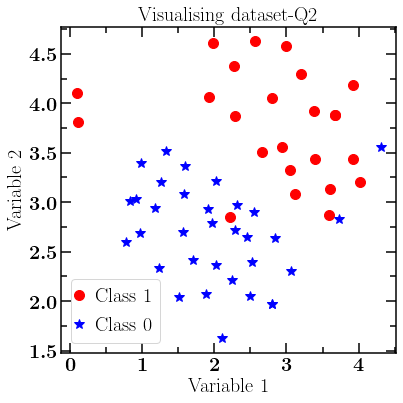

In [23]:
x1 = df_2['Variable 1'].values
x2 = df_2['Variable 2'].values
y = df_2['Class'].values
for i in range(len(y)):
    if y[i]==-1:
        plt.plot(x1[i],x2[i],'-b*')
    if i==49:
        plt.plot(x1[i],x2[i],'-b*',label='Class 0') 
    
    if y[i]==1:
        plt.plot(x1[i],x2[i],'-ro')
    if i==19:
        plt.plot(x1[i],x2[i],'-ro',label='Class 1')
fontl  = {'fontweight':1000,'fontsize':12}
plt.legend(handlelength=0,frameon=True)
plt.title("Visualising dataset-Q2")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
# plt.savefig("Q2.png",dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

Q3. Now apply SVM with “modified optimization problem” on Data2.xlsx and try out different values of C and report your observations along with plots of the decision boundary.

<h2>Modified Optimization Problem

0.2 0.91
0.6 0.93
1.0 0.93


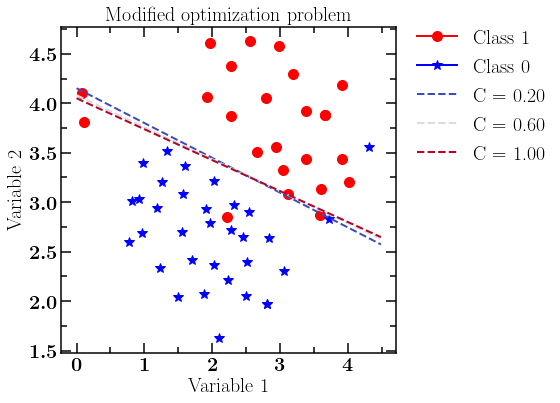

In [30]:
#Plotting the data
x1 = df_2['Variable 1'].values
x2 = df_2['Variable 2'].values
y = df_2['Class'].values
for i in range(len(y)):
    if y[i]==-1:
        plt.plot(x1[i],x2[i],'-b*')
    if i==49:
        plt.plot(x1[i],x2[i],'-b*',label='Class 0') 
    
    if y[i]==1:
        plt.plot(x1[i],x2[i],'-ro')
    if i==19:
        plt.plot(x1[i],x2[i],'-ro',label='Class 1')
fontl  = {'fontweight':1000,'fontsize':12}
plt.legend(handlelength=0,frameon=True)
plt.title("Modified optimization problem")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")

#Modified Optimization Problem starts
X = df_2[df_2.columns[0:-1]]
y = df_2[df_2.columns[-1]]

cc = plt.cm.coolwarm
# colors = cc(np.linspace(0, 1, len(C)))

# C=[0.1,0.2,0.3,0.4,1,2,3,4,5]
C = np.arange(0.1,1,0.1)
C = np.array([0.2,0.6,1.0])
scr = []
colors = cc(np.linspace(0, 1, len(C)))
for i in range(len(C)):
    lin_svc=svm.LinearSVC(C=C[i],max_iter=10000).fit(X,y)
    c=lin_svc.coef_
    intercept=lin_svc.intercept_
    xx = np.arange(0.0,4.5,0.01)
    yy = -(c[0][0]/c[0][1])*xx - intercept/c[0][1]
    plt.plot(xx,yy,color=colors[i],ls='--',label='C = %0.2f'%C[i])
    print(C[i],'%0.2f'%lin_svc.score(X,y))
    scr.append(lin_svc.score(X,y))
    # plt.legend()
#     ax = plt.axes()
#     ax.arrow(1.0,4.0,0,0.4,head_width=0.05, head_length=0.1, fc='g', ec='g')
#     plt.text(0.5,3.8,'Decision boundary',fontl)
#     plt.text(0.5,3.65,'m=%0.2f, c=%0.2f'%(c[0][0]/c[0][1],intercept/c[0][1]),fontsize=12)
#     plt.show()
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1.05))
plt.savefig("Q3_comp.png",dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()

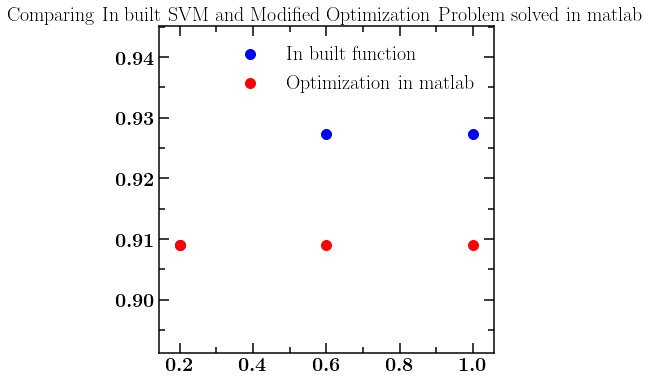

In [29]:
plt.scatter(C,scr,label='In built function')
c_optim = [0.2,0.6,1.0]
a_optim = [0.909,0.909,0.909]
plt.scatter(c_optim,a_optim,label='Optimization in matlab')
plt.legend()
plt.title('Comparing In built SVM and Modified Optimization Problem solved in matlab')
plt.savefig('pnVSmb.png',dpi=300,facecolor='w', edgecolor='k', bbox_inches='tight')
plt.show()